# London Underground: Where are people going?
Peter Stasiw

## Introduction
The general london population use the underground to travel for various reasons, however, peak times in the week are often caused by people getting to or from work.
The purpose of this report is to evaluate the exit count of the stations to come to a conclusion about the density of where the workplaces are and if a station is predominently near workplaces or residential areas. 

## Part 1: Dataframe Creation
Table 1

In [1]:
import pandas as pd
exits = pd.read_csv('hourlyExits.csv', index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


### Extracting only peak times and sumating
We are only interested in the peak times which I have extracted from the data. I have defined these as AM_Peak being between 7am and 10am, and the PM_Peak being between 4pm and 7pm. The table below (Table 2) shows the exit peak times at each station, and also the daily total exits across all operating hours in the last column.

In [2]:
peak_counts = pd.DataFrame().assign(AM_Peak = exits.loc[:, ['H07', 'H08', 'H09']].apply(sum, axis=1),
                                    PM_Peak = exits.loc[:, ['H16', 'H17', 'H18']].apply(sum, axis=1),
                                    Total_Daily = exits.apply(sum, axis=1))

peak_counts 

,AM_Peak,PM_Peak,Total_Daily
Station,,,
Acton Town,1970,2628,9362
Aldgate,7408,2992,16136
Aldgate East,7618,3803,21206
Alperton,856,1847,5118
Amersham,424,1465,3905
...,...,...,...
Wimbledon Park,497,1114,3296
Wood Green,2165,6494,18989
Wood Lane,1798,1766,6610


### Calculating proportion
To make it equal across busy and none-busy stations, I have calculated the proportion of total daily exits corresponding to either the AM or PM peak. The table below (Table 3) shows these proportions as value between 0 and 1. A value of 1 would imply that all of the daily exits occur in the peak and 0 would imply that no exits occur during the peak.

In [3]:
def calcProportionAM(row):
    return row.loc['AM_Peak'] / row['Total_Daily']

def calcProportionPM(row):
    return row.loc['PM_Peak'] / row['Total_Daily']


proportion = peak_counts.assign(AM_prop = peak_counts.apply(calcProportionAM, axis=1), 
                                PM_prop = peak_counts.apply(calcProportionPM, axis=1))

proportion

,AM_Peak,PM_Peak,Total_Daily,AM_prop,PM_prop
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


The proportion table shows the exit values, and proportion compared to the whole day, at each station during peak morning times (7, 8 and 9am) and peak afternoon times (4, 5 and 6pm).

# Part 2: Plotting
This table below (Table 4) shows the spread of the data, which I will use later on to assist me in my conclusions.

In [4]:
proportion.describe()

,AM_Peak,PM_Peak,Total_Daily,AM_prop,PM_prop
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


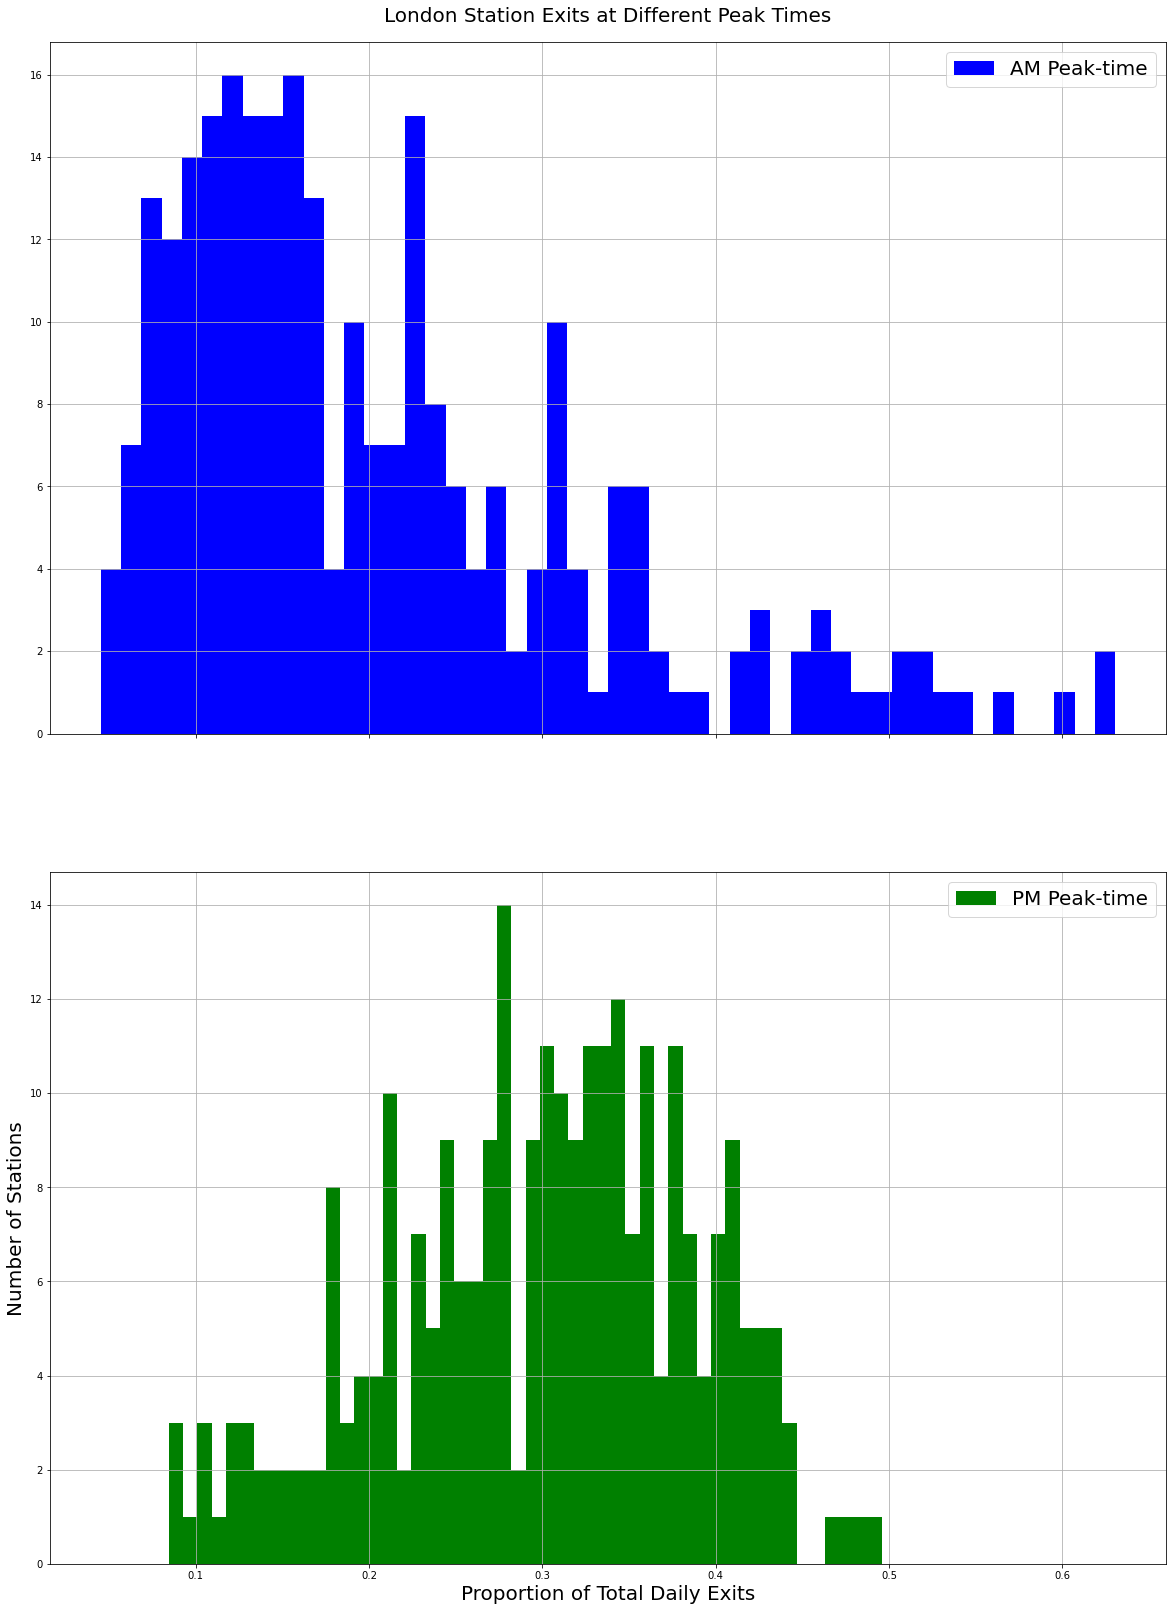

In [5]:
import matplotlib.pyplot as plt

fig, (b1,b2) = plt.subplots(2, 1, figsize=(20,28), sharex=True)
plt.title("London Station Exits at Different Peak Times", fontsize=20, pad = 850)
plt.xlabel("Proportion of Total Daily Exits", fontsize=20)
plt.ylabel("Number of Stations", fontsize=20)

b1.hist(proportion.AM_prop, bins = 50, color='blue')
b1.legend(["AM Peak-time"], fontsize=20)
b1.grid()

b2.hist(proportion.PM_prop, bins = 50, color='green')
b2.legend(["PM Peak-time"], fontsize=20)
b2.grid()

### Description
The above histograms (Figure 1) compare the spread of the proportion of exits during the AM and PM peak times.
AM looks positively skewed (lots of the data has low values) and this is affirmed as the median is lower than the mean. Whereas PM looks almost symetrical together with the median and mean being similar.
This suggests that people exit from a wider number of stations in the AM than the PM. This is further reflected in Table 4 with the range and standard deviation of AM being larger than PM, and all of the quartiles in AM being larger than PM. It could be possible that lots of people live in the same area so return to the same stations in the PM, but work in a wide variety of areas so get off at various stations in the AM.


## Part 3: Classification
Using proportions from the previous dataframe (Table 3) allows me to set a threshold (of significant difference) applicable to all stations.
First I calculated the difference on the entire dataset to allow for calculation of the quartiles (a measure of spread).
See Table 5 Below and Table 6.

In [6]:
def calcDifference(row):
    return row.loc["PM_prop"] - row.loc["AM_prop"]


differences = proportion.assign(Prop_Difference = proportion.apply(calcDifference, axis=1))
differences

,AM_Peak,PM_Peak,Total_Daily,AM_prop,PM_prop,Prop_Difference
Station,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,0.070284
Aldgate,7408,2992,16136,0.459098,0.185424,-0.273674
Aldgate East,7618,3803,21206,0.359238,0.179336,-0.179902
Alperton,856,1847,5118,0.167253,0.360883,0.193630
Amersham,424,1465,3905,0.108579,0.375160,0.266581
...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,0.187197
Wood Green,2165,6494,18989,0.114013,0.341987,0.227974
Wood Lane,1798,1766,6610,0.272012,0.267171,-0.004841


In [7]:
differences.describe() # note the upper and lower quartile (to set thresholds)

,AM_Peak,PM_Peak,Total_Daily,AM_prop,PM_prop,Prop_Difference
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750,0.091618
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724,0.203932
min,27.000000,239.000000,596.000000,0.045302,0.084630,-0.539649
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947,-0.014010
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397,0.139068
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596,0.242542
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079,0.440373


### Selecting a sample of stations
For ease of evaluation, I have selected stations on the northern line. The northern line crosses a diverse set of areas which will allow me to make comparisons of the stations. See Table 7 below.

In [8]:
sample = differences.loc[["Archway", "Balham", "Embankment", "Goodge Street", "Highgate", 
                           "High Barnet", "Leicester Square", "Morden", "South Wimbledon",
                           "Tottenham Court Road", "Warren Street"], :]
sample

,AM_Peak,PM_Peak,Total_Daily,AM_prop,PM_prop,Prop_Difference
Station,,,,,,
Archway,2190,4106,13935,0.157158,0.294654,0.137496
Balham,2637,7635,22128,0.119170,0.345038,0.225868
Embankment,10692,8829,33781,0.316509,0.261360,-0.055149
Goodge Street,5374,1949,12817,0.419287,0.152064,-0.267223
Highgate,893,3170,8921,0.100101,0.355341,0.255240
High Barnet,987,2362,6843,0.144235,0.345170,0.200935
Leicester Square,8952,12915,47772,0.187390,0.270347,0.082957
Morden,1550,5955,15680,0.098852,0.379783,0.280931
South Wimbledon,1335,2198,7197,0.185494,0.305405,0.119911


### Defining each station as 'Work', 'Residential', or 'Other
This is largely based on the differences. I have used the quartiles of all the stations to assign stations in the sample to Work or Residential. If the difference between the proportions of AM and PM peaks are within the middle 50% of all differences in the whole dataset, I assume that they cannot be characterised as being close to work or residential areas. However, if they fall lower than the middle 50% of all stations, they are classed as work (because they are higher proportions in the AM, returning a more negative difference) and vice versa in the PM. See the column "Station_Kind" on Table 8 below.

In [9]:
def work_res(row):
    if row.loc["Prop_Difference"] > differences.Prop_Difference.quantile(0.75):
        return "Residential"
    elif row.loc["Prop_Difference"] < differences.Prop_Difference.quantile(0.25):
        return "Work"
    else:
        return "Other"

work_or_res = sample.assign(Station_Kind = sample.apply(work_res, axis=1))
work_or_res

,AM_Peak,PM_Peak,Total_Daily,AM_prop,PM_prop,Prop_Difference,Station_Kind
Station,,,,,,,
Archway,2190,4106,13935,0.157158,0.294654,0.137496,Other
Balham,2637,7635,22128,0.119170,0.345038,0.225868,Other
Embankment,10692,8829,33781,0.316509,0.261360,-0.055149,Work
Goodge Street,5374,1949,12817,0.419287,0.152064,-0.267223,Work
Highgate,893,3170,8921,0.100101,0.355341,0.255240,Residential
High Barnet,987,2362,6843,0.144235,0.345170,0.200935,Other
Leicester Square,8952,12915,47772,0.187390,0.270347,0.082957,Other
Morden,1550,5955,15680,0.098852,0.379783,0.280931,Residential
South Wimbledon,1335,2198,7197,0.185494,0.305405,0.119911,Other


### Explanation of station location and their categorisation
#### Comparing with their viscinity on maps
* Goodge Street is close to a university and hospital, so fits the classification of work.
* Highgate is surrounded by houses.
* Morden is also surrounded by multiple houses, at the end of the northern line, and close to a doctor's surgery which confirms the residential nature.
* Tottenham Court Road is surrounded by offices which fits its work category.
* Warren Street is classified as work and is the most significant difference out of the sample. The map shows it close to a large hospital and offices.